In [276]:
%matplotlib inline
import numpy as np
import scipy.signal as signal    # Notice this one is new!
import matplotlib.pyplot as plt
from matplotlib import cm as colormap
from mpl_toolkits.mplot3d import Axes3D
import math
import cmath
from scipy import interpolate 
from scipy.spatial import distance 
from copy import deepcopy

(369, 238)
(2, 3721)
(2, 84101)
black_coord(Test)
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [2. 1.]
 [2. 3.]]


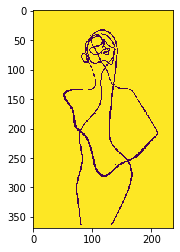

In [277]:
#import image 
Test = np.array([[1,1,1,1,1], [1,0,0,0,1], [1,0,1,0,1], [1,1,1,1,1]])
#SHOOT this whole thing should be a function probably. 
def Import(photo):
    img = plt.imread(photo)
    plt.figure()
    #plt.imshow(img)
    return img

#turn image into array 
def NotGray(thresh, image):
    imarray = np.array(image)
    #makeit truely black and white:
    for i in range(len(imarray)):
        for j in range(len(imarray[0])):
            #print(imarray[0][0])
            for k in range(3):
                #thresh = 200             #by raising this will pick up more grey values included
                                        #will be darker/more continuous but also more noisy- this might becom param of eqn.
                if imarray[i][j][k] < thresh:
                    imarray[i][j][k]=0     #0 is what 'black' is for python color codes
                else: imarray[i][j][k]=255 #255 is 'white' 
    return imarray
img = Import('greyish.jpg')
imarray = NotGray(230, img)
plt.imshow(imarray) #this will show the pure black and white image
                            #These following lines are just to check that now each triplet have the same values(it comes from the RGB plt.imread)
                            #for i in range(len(imarray)):            
                            #    for j in range(len(imarray[0])):
                            #        for k in range(len(imarray[0][0])):
                            #             if imarray[i][j][k] != imarray[i][j][0]:
                            #                print(imarray[i][j])
def CollapseRBG(array):  #array is NxMx3
    bwimarray = np.zeros([len(array), len(array[0])])  #Here I am turning my RBG array into a BW array (Collapsing third dim)
    for i in range(len(array)):
        for j in range(len(array[0])):
            bwimarray[i][j] = array[i][j][0]    #Setting each element the array to the last elemet of the triplet since they are all the same.      
    return bwimarray                                        #This might be kinda messed up if the photo you upload isnt black and white. But it shouldent be too messed up

bwimarray = CollapseRBG(imarray)
print(np.shape(bwimarray))
plt.imshow(bwimarray)
def BWCoords(array):
    black = np.where(bwimarray == 0)     #these are the locations of each black pixel
    white = np.where(bwimarray == 255)    #these are the locations of each white pixel
    return black, white

black, white = BWCoords(bwimarray)
print(np.shape(black))
print(np.shape(white))
#print(black)
#print(bwimarray[black])

#print(white)
#print(bwimarray[white])

w_index = white[0] #These are the locations? of each white pixel 
#obj1 = enumerate(trythis)

bwimarray_copy = bwimarray
for num, pixel in enumerate(w_index):
    bwimarray_copy[pixel] = num+1


    
    
def black_coords(array):
    black = np.where(array==0)
    b = np.zeros([len(black[0]),2])
    #print(len(black[0]))
    for i in range(len(black[0])):
        coord = np.array([black[0][i], black[1][i]])
        b[i] = coord
    return b
print('black_coord(Test)')    
print(black_coords(Test))

def PairCoord_Index(start, coordslist): 
    """
    start needs to be an np.array([x,y]) where [x,y] in coordlist
    and x, y are floats
    this is going to be finicky 
    """
    pair_dict = dict()
    start_str = str(start)
    for i in enumerate(coordslist):
        coord_str = str(i[1])
        #print(coord_str)
        pair_dict[coord_str] = i[0]
    return pair_dict[start_str]


###distance between each black coord with another
def Distance(coord_list):
    distance_matrix = distance.cdist(coord_list, coord_list)
    return distance_matrix



 #I have no idea why this is now showing a yellow and purple image? 
#print('rels and pix are:',bwimarray_copy[pix])

#having checked this with rainbows, it honestly workes as expected. a little slow for a 440 KB photo, rel fast for 140 KB
#for rainbow picture with lower thresh, will be difference in bwimarray with what is plotted(choosing R, B or G)
#I think just always put a reg picture in that happens to only be greyscale. 



In [278]:
def BestPath(start, array):
    """
    Start in form np.array([x., y.])
    """
    coordinates= black_coords(array)
    print(len(coordinates))
    matrix = Distance(coordinates)
    sp = PairCoord_Index(start, coordinates)
    path_coord_x = [coordinates[sp][0]]
    path_coord_y = [coordinates[sp][1]]
    print(sp)
    path_index = [sp]
    #print('len(coordinates)')
    #print(len(coordinates))
    for i in range(len(coordinates)):
        row =matrix[sp,:]
        for j in path_index:
            row[j] = np.infty
        closest = np.argmin(row)
        #print('for i=', i, 'closest =', closest)
        path_coord_x.append(coordinates[closest][0])
        path_coord_y.append(coordinates[closest][1])
        path_index.append(closest)
        sp = closest
    path_coord_x.append(path_coord_x[0])
    path_coord_y.append(path_coord_y[0])
    path_index.append(path_index[0])
    return path_coord_x, path_coord_y
    


In [279]:
#print(Test)
#start = np.array([2.,1.])
#print(BestPath(start, Test))
#Test = np.array([[1,1,1,1,1], [1,0,0,0,1], [1,0,1,0,1], [1,1,1,1,1]])
#print(list(enumerate(black_coords(Test))))
##print(Test)

(695, 800, 3)


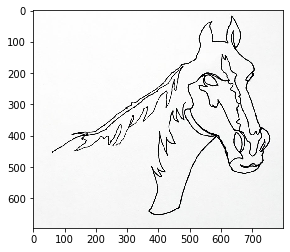

In [280]:
horse = Import('horse.jpg')
plt.imshow(horse)
print(np.shape(horse))

In [281]:
horse = NotGray(200, horse)
print(np.shape(horse))
horse = CollapseRBG(horse)
blackpix = black_coords(horse)
print(blackpix[0])
#start = blackpix[1300]
#horse_path=BestPath(start, horse)

(695, 800, 3)
[ 18. 631.]


In [282]:
print(len(horse_path[0]))

26114


In [283]:
y = np.array([0,1,2,3,4,5,0])
print(y)
y = y- y[0]
print(y)

[0 1 2 3 4 5 0]
[0 1 2 3 4 5 0]


26114
26114
1000


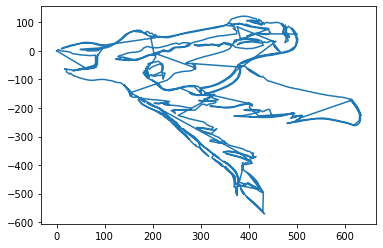

In [445]:
from scipy.interpolate import UnivariateSpline
##Going to make line approximation; using UnivariateSpline 
##Splines are linear approximations to a line. 
def lineapprox(path_x, path_y, plot=True):
    arange = np.arange(0, len(path_x),1)
    path_x_array = np.array(path_x)
    path_y_array = np.array(path_y)
    flip_y = -1*path_y_array
    x_approx = UnivariateSpline(arange, path_x_array)
    y_approx = UnivariateSpline(arange, path_y_array)
    #print(type(x_approx))
    # print(x_approx.size)
    x_approx_array = [0] * 1000
    y_approx_array = [0] * 1000
    index = 0
    for v in (np.linspace(0, len(path_x)-1, 1000)):
        #print('type in here: ', type(x_approx(v)))
        #print('this item: ', x_approx(v))
        x_approx_array[index] = float(x_approx(v))
        y_approx_array[index] = float(y_approx(v))
        index += 1
    #print(x_approx_array)
    #print(y_approx_array)
    t = np.linspace(0, len(path_x), 1000)
    endpoint_x = np.mean([x_approx_array[0], x_approx_array[-1]])
    x_approx_array[0] = endpoint_x
    x_approx_array[-1] = endpoint_x
    x_approx_array = x_approx_array - x_approx_array[0]                      
          
    endpoint_y = np.mean([y_approx_array[0], y_approx_array[-1]])
    y_approx_array[0] = endpoint_y
    y_approx_array[-1] = endpoint_y
    y_approx_array = y_approx_array - y_approx_array[0]
    
    if plot == True:
        #plt.plot(x,y, 'k')
        #plt.plot(*zip(*[(x_approx(v), y_approx(v)) for v in np.linspace(0, len(path_x)-1, 1000)]))
        plt.plot(x_approx_array, y_approx_array)
        #plt.gca().invert_xaxis()
        #plt.gca().invert_yaxis()
        #plt.plot(splines)
        #plt.plot(arange, x_approx)
        #pltl.plot(arange, y_approx)
    return x_approx_array, y_approx_array,t
x = horse_path[0]
y = horse_path[1]
print(len(y))
print(len(x))
horse_splines = lineapprox(x,y, plot=True)
print(len(horse_splines[0]))

I need to understand Zip alot better ??elena's help?
I need to understand UnivariateSplines better- data types
Want to figure out how to rotate
_Dont understand what is going on with the parametric plotting- need to do that by tomorrow
would like to have started FFT by end of tomorrow
Finished Image detector by end of Friday.
Make measurements Saturday and Sunday
Make poster Monday and Tuesday 

In [299]:
print('Howzit going??')
print("Lets get crackalackin")


Howzit going??
Lets get crackalackin


endpoint
18.176764847905805
c_n= (1.7849247624404634-3.075734788897567j)
c_n= (-0.4524985602227134+2.0290367240827916j)
c_n= (1.0506004642644193+1.9603022616716852j)
c_n= (-0.8035812306857303+0.5040939903937364j)
c_n= (0.582255071807443-0.168518054923256j)
[ 1.78492476-3.07573479j -0.45249856+2.02903672j  1.05060046+1.96030226j
 -0.80358123+0.50409399j  0.58225507-0.16851805j]
endpoint
632.4380134838292
c_n= (0.08982739672649553-3.722172890058662j)
c_n= (0.4778082129038408-1.7784810966371154j)
c_n= (-0.35884555013853886-0.09515234203551862j)
c_n= (-0.36275706486736214-0.7403657831330659j)
c_n= (0.21974933944575578+0.7086267781409485j)
[ 0.0898274 -3.72217289j  0.47780821-1.7784811j  -0.35884555-0.09515234j
 -0.36275706-0.74036578j  0.21974934+0.70862678j]


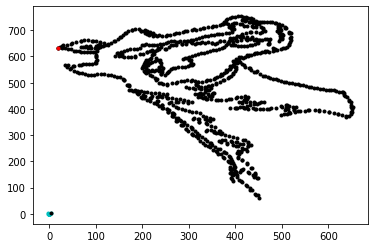

In [305]:
def c_n(n,f,t, T):
    """
    f is an array...is t? no. right now t is our variable.
    """
    cn = np.sum((1/T)*f*np.exp(2*np.pi*-1j*n*t/T))
    print('c_n=', cn)
    return cn


def FourierTransform(f, N):
    """
    f is a function of 't' should be an array evaluated 
    """
    #need to make c_ns
        #inputing x(t) so need tvalues
        #need T- the 'period'
        #how many t_values do I need?
    T = len(f)
    t = np.linspace(0, 26114-1, 1000)
    endpoint = np.mean([f[0], f[-1]])
    print('endpoint')
    print(endpoint)
    f[0] = endpoint
    f[-1] = endpoint
    f = f - f[0]    
    ###START OVER###
    #Want 
    #for i in range(T):
    #    fft_t = cn
    
    ################
    cn = np.ndarray(N, dtype=np.complex128)
    for i in range(0, N):
        cn[i] = c_n(i+1,f,t,T)
    print(cn)
    #fft_at_t
    f_ft = np.ndarray(T)
    
    
    
    
    for i in range(N):
        for j in range(T):
            
            f_ft[i] = np.sum(np.real(cn[i]*np.exp(2*np.pi*1j*(i+1)*t[j]/T)))
 
    FT_f = f_ft

    return FT_f, endpoint



xt = np.array(horse_splines[0])
yt = np.array(horse_splines[1])
T = len(xt)
#t = np.linspace(0, T, 1000)
      
#print(type(xt))
#yt = np.array(horse_splines[1])
#print(np.shape(xt))

FT_x,x_o = FourierTransform(xt, 5)
#print(type(FT_x))
FT_y,yq_o = FourierTransform(yt, 5)
plt.plot(xt,yt, 'k.')
plt.plot(FT_x, FT_y, 'c.')
plt.plot(x_o, y_o, 'r.')
plt.plot(FT_x[0], FT_y[0], 'k.')


#print(FT_x)
#print(FT_y)
    

In [306]:
#print(horse_splines[2])

In [ ]:
 def cn(n):
            c = y*np.exp(-1j*2*n*np.pi*t_vals/period)
            #print(c)
            return(c.sum()/c.size)

        coefs = [cn(i) for i in range(1,N+1)]
        print(coefs)

        def f(x, degree=N):
            # Evaluate the function y at time t using Fourier approximiation of degree N
            f = np.array([2*coefs[i-1]*np.exp(1j*2*i*np.pi*x/period) for i in range(1,degree+1)])
            return(f.sum())
       
        # Evaluate function at all specified points in t domain
        fourier_approximation = np.array([f(t, degree=N).real for t in t_vals])

26114
<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>
(1000,)


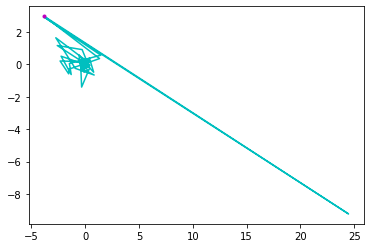

In [334]:
def c_n(n,f,t, T):
    """
    f is an array...is t? yes, we are integrating over all t
    """
    cn = np.sum((1/T)*f*np.exp(2*np.pi*-1j*n*t/T))
    #print('c_n=', cn)
    return cn
def f_at_one_time(time,n,f,t_vals, T):   
    func = 2*c_n(n, f, t_vals, T)*np.exp(2*np.pi*1j*n*time/T)
    return func.real

def FourierTransform(f_vals,t_vals, N):
    t= t_vals
    T = int(t[-1])
    f = f_vals
    endpoint = np.mean([f[0], f[-1]])
    f[0] = endpoint
    f[-1] = endpoint
    f = f - f[0]    
    Fft_at_time= np.ndarray(len(t), dtype=np.complex128)
    for i in range(len(Fft_at_time)):
        Fft_at_time[i] = f_at_one_time(t[i], i+1, f, t, T)     
    print(type(Fft_at_time))
    print(np.shape(Fft_at_time))
    return Fft_at_time, endpoint



xt = np.array(horse_splines[0])
t = np.array(horse_splines[2])
yt = np.array(horse_splines[1])
T = int(t[-1])
print(T)
#t = np.linspace(0, T, 1000)
      
#print(type(xt))
#yt = np.array(horse_splines[1])
#print(np.shape(xt))

FT_x,x_o = FourierTransform(xt,t, 1)
#print(type(FT_x))
FT_y,yq_o = FourierTransform(yt,t, 1)
#plt.plot(xt,yt, 'k.')
plt.plot(FT_x, FT_y, 'c-')
#plt.plot(x_o, y_o, 'r.')
plt.plot(FT_x[0], FT_y[0], 'm.')


#print(FT_x)
#print(FT_y)
    

In [441]:
t_test = np.linspace(0, 2*np.pi, 1000)
f_test = np.sin(t_test)


In [442]:
def cn(f, t, n):
    ##t needs to be from 0 to T interval. 
    T = t[-1]
    delta_t = T/len(t)
   # print(T)
    integrand = (1/T)*f*np.exp(-1j*2*np.pi*n*t/T)
    #print(type(integrand))
    
    integral =(sum(integrand))*delta_t
    #print(type(integral))
    return integral
#outputs COMPLEX NUMBER



In [443]:
def f_one_x_one_n(f, t, n, cn, x):
    T = t[-1]
    term = cn*np.exp(1j*2*np.pi*n*x/T)
    return term
def fft_at_t(f,t,x, N): #Please o Please let N be even)
    f_of_t = 0
    #print('x=', x)
    for i in range(-N//2,N//2+1):
        c_i = cn(f,t,i)
        #print('c_',i,'=',c_i)
        additional_term =f_one_x_one_n(f,t,i,c_i,x)
        f_of_t += additional_term
        #print(i,'th term of f=', additional_term)
    return f_of_t  
test_fft_specific_t = fft_at_t(f_test, t_test, t_test[999], 2) 
print(test_fft_specific_t)

(-2.0621067181643721e-16+0j)


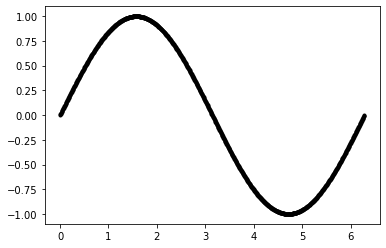

In [444]:
def F_all_t(f, t, N):
    FT_of_f = np.zeros(len(t))
    
    for i in range(len(t)):
        FT_of_f[i] = fft_at_t(f, t, t[i], N).real
    return FT_of_f
fft_test = F_all_t(f_test, t_test, 2)
plt.plot(t_test, fft_test, 'k.')
#print(fft_test)


In [ ]:
xt = np.array(horse_splines[0])
t = np.array(horse_splines[2])
yt = np.array(horse_splines[1])

fft_x = F_all_t(xt, t, 150)
fft_y = F_all_t(yt, t, 150)

plt.plot(xt,yt)
plt.plot(fft_x, fft_y)
plt.plot(fft_x[0], fft_y[0], 'ko')
plt.plot(xt[0], yt[0], 'ro')
plt.plot(xt[-1], yt[-1], 'ro')
plt.plot(fft_x[-1], fft_y[-1], 'm.')

In [399]:
Test = np.array([[1,1,1,1,1], [1,0,0,0,1], [1,0,1,0,1], [1,1,1,1,1]])
black = np.where(Test==0)
black_coords = np.zeros((len(black[0]),2))

for i in range(len(black[0])):
    coord = np.array([black[0][i], black[1][i]])
    black_coords[i] = coord
    
print(black_coords[1])

start = np.array([1.,2.])

PairCoord_Index(start, black_coords)
    
#pair_dict = dict()
#for i in enumerate(black_coords):
#    coord_str = str(i[1])
#    print(coord_str)
#    pair_dict[coord_str] = i[0]
#    
#print(pair_dict)

#print(pair_dict[str()])

#print(pairer_dict)
    
# dictionary where keys are coordinates and the values are the indices 

#print(BestPath(start, Test))

[1. 2.]


1

In [288]:
black_coords

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [2., 1.],
       [2., 3.]])

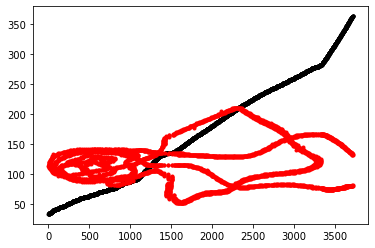

In [6]:
time = np.arange(0, len(black[0]),1)
plt.plot(time, black[0], 'k.')
plt.plot(time, black[1], 'r.')

plt.show()

(7, 7)
[[ 1  2  3  4  5]
 [ 6  0  0  0  7]
 [ 8  0  9  0 10]
 [11 12  0  0 13]
 [14 15 16 17 18]]
[[ 1  2  3  4  5]
 [ 6  0  0  0  7]
 [ 8  0  9  0 10]
 [11 12  0  0 13]
 [14 15 16 17 18]]


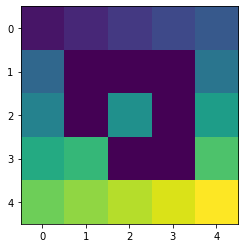

In [82]:
test = np.array([ [0, 255, 0, 255,0,255,0], [255,0,255,0,255,0,255], [0,255,0,255,0,255,0],
                 
                 [255,0, 255,0,255,0,255], [0,255,0,255,0,255,0],[255,0,255, 0,255, 0, 255], [0,255,0,255,0,255,0]])
print(np.shape(test))
newtest = np.array([[1, 2,3, 4, 5],[6,0,0,0,7],[8,0,9,0,10], [11,12,0,0,13],[14, 15,16, 17, 18]])
b = np.where(test==0)
w = np.where(test==255)
time = np.arange(0, len(b[0]), 1)
#plt.plot(time, b[0], 'ko')
#plt.plot(time, b[1], 'r.')
plt.show()
#print(time)
plt.imshow(newtest)
#print(b)
#print(w)
#print(test[b])
print(newtest)

trythis = newtest
print(trythis)

EVERYTHING FROM n=2
and
up 3 left 1
up 3 left 2    one extra
up 3 left 3

up 3 right 1
up 3 right 2    one extra
up 3 right 3

down 3 left 1
down 3 left 2    one extra
down 3 left 3

down 3 right 1
down 3 right 2   one extra
down 3 right 3

down 1 left 3
down 2 left 3

down 1 right 3
down 2 right 3

up 1 left 3
up 2 left 3
up 1 right 3
up 2 right 3






16

two up one left
two down one left
two up one right
two down one right

two up two left
two down two left
two up two right
two down two right

one up two left
one up two right
one down two left
one down two right

12 permutations for n=2

for n =3


In [83]:
"""
here its should be a positive integer. for our purposes, imarray should be surrounded by a boarder of whites. 
hopefully by a large buffer of whites.



"""
def bottom(imarray, its):
    new = np.roll(imarray, shift =-its, axis=0)
   
    return new

def top(imarray, its):
    new = np.roll(imarray, shift =its, axis=0)
    return new


def left(imarray, its):
    new = np.roll(imarray, shift =-its, axis=1)
    return new

def right(imarray, its):
    new = np.roll(imarray, shift =its, axis=1)

    return new
def  ne(imarray, northits, eastits):
    north = top(imarray, northits)
    east = left(north, eastits)
    return east
def  se(imarray, southits, eastits):
    south = bottom(imarray, southits)
    east = left(south, eastits)
    return east

def  sw(imarray, southits, westits):
    south = bottom(imarray, southits)
    west = right(south, westits)
    return west
def  nw(imarray, northits, westits):
    north = top(imarray, northits)
    west = right(north, westits)
    return west
    
    
#top(newtest, 1)
print(newtest)
print(trythis)

[[ 1  2  3  4  5]
 [ 6  0  0  0  7]
 [ 8  0  9  0 10]
 [11 12  0  0 13]
 [14 15 16 17 18]]
[[ 1  2  3  4  5]
 [ 6  0  0  0  7]
 [ 8  0  9  0 10]
 [11 12  0  0 13]
 [14 15 16 17 18]]


In [84]:
print(newtest)
#This is not going to work- how will I stop pickiing the same squares when I run this iteratively???

def nextPixel(startx, starty, imarray, maxits):            #shoooooot this is not going to do euclidian distance(ie no diagonals)
    its = 1
    for i in range(1, maxits):
        if top(imarray, i)[startx][starty]==0:
            print('moved up', i)
            return [startx-i, starty]
        
        elif left(imarray, i)[startx][starty]==0:
            print('moved left', i)
            return [startx, starty-i]#this is not right, need to return new coord not 0
        
        elif bottom(imarray, i)[startx][starty]==0:
            print('moved down', i)
            return [startx+i, starty]
        
        elif right(imarray, i)[startx][starty]==0:
            print('moved right', i)
            return [startx, starty+i]
        
        for j in range(1, its):
            for k in range(1, its):
                if ne(imarray, j, k)[startx][starty]==0:
                    print( 'moved north', j, 'moved east', k)
                    return [startx-j, starty+k]

                elif se(imarray, j, k)[startx][starty]==0:
                    print( 'moved south', j, 'moved east', k)
                    return [startx+j, starty+k]

                elif sw(imarray, j, k)[startx][starty]==0:
                    print( 'moved south', j, 'moved west', k)
                    return [startx+j, starty-k]

                elif nw(imarray, j, k)[startx][starty]==0:
                    print( 'moved north', j, 'moved west', k)
                    return [startx-j, starty-k]
       
        else: its += 1
    return 'no black pixles close by'


#I really might make a new function for this at some point. It mightnot work as well as I would like.
# there absolutley must be a fater way to do this
# I guarentee it. Some package somewhere has something faster. 
#moving on for now. 


"""

Wait wait wait
I know the exact positions of each black pixle
take distance between each of those values(for n black pixles should be n+n-1+...+1 number of calculations)
find min value of the distances. 

"""
coord = nextPixel(0,4, newtest, 5)
print(coord)
print(trythis)
print(newtest)

[[ 1  2  3  4  5]
 [ 6  0  0  0  7]
 [ 8  0  9  0 10]
 [11 12  0  0 13]
 [14 15 16 17 18]]
moved south 1 moved west 1
[1, 3]
[[ 1  2  3  4  5]
 [ 6  0  0  0  7]
 [ 8  0  9  0 10]
 [11 12  0  0 13]
 [14 15 16 17 18]]
[[ 1  2  3  4  5]
 [ 6  0  0  0  7]
 [ 8  0  9  0 10]
 [11 12  0  0 13]
 [14 15 16 17 18]]


In [73]:
blackcoords = np.transpose(black,copy = False, starting_point= "random" )

from copy import deepcopy


def closestpixel(start, blackcoords):
    alldistances = scipy.spacial.cdist(start, blackcoords)
    closest = argmin(alldistances)
    
    
    if copy = True:
        
    
        # Calcualte distance between each pair of coords
        dist_mat = scipy.spacial.cdist(coord_list, coord_list, 'euclidean')   #need coord_list

        # Initialize sear\ch space with nearest neighbor tour
        cities = coord_list
        num_cities = len(cities)
        if starting_point=="random":
            start = int(np.random.choice(range(num_cities),size=1))
        else:
            assert starting_point < num_cities
            start = starting_point
        tour = [start]
        active_city = start
        for step in range(0, num_cities):
            dist_row = deepcopy(dist_mat[active_city,:])     #need deep copy 
            for done in tour:
                dist_row[done] = np.inf
            nearest_neighbor = np.argmin(dist_row)
            if nearest_neighbor not in tour:
                tour.append(nearest_neighbor)
            active_city = nearest_neighbor

        y_tour = -np.array([cities[tour[i % num_cities]] for i in range(num_cities+1) ])[:,0]
        y_tour = y_tour - y_tour[0]#- min(y_tour)
        x_tour = np.array([cities[tour[i % num_cities]] for i in range(num_cities+1) ])[:,1]    
        x_tour = x_tour - x_tour[0]#- min(x_tour)

        # Circle tour back to beginning
        np.append(x_tour, x_tour[0])
        np.append(y_tour, y_tour[0])
        num_cities = num_cities + 1
        
    

array([[ 33, 113],
       [ 33, 114],
       [ 33, 115],
       ...,
       [363,  81],
       [363, 132],
       [363, 133]], dtype=int64)

In [87]:
"""
the goal for this function is to make something that iteratively calls next pixle until 'most'
of the elements of black pixels have been used, never going backwards? somethimes you want to
go backwards I feel. Oh jeeze I dont know.
Lets say for now, 90% of the black pixles have been used, and non are reused.

        Input: starting point, array
        path = []
        make a copy of array that we wil mess with
        find total number of pixles of og array
        while len(path)< .9*total number of pixles of og array)     maybe make .9 configurable. 
            run next pixle on starting point, copy of array 
            append path with next pixle
            delete starting point from copy of array
            update starting point with result of next pixle
        return path
lets try it
"""

def PathMaker(startx, starty, array):
    x = startx
    y = starty
    path = []
    copy = array
    blacks = np.where(0==array)
    nblacks = len(blacks[0])
    percent = .9
    print(copy)
    while len(path) < percent*nblacks:
        maxits = 15
        print(len(path))
        newpos = nextPixel(x, y, copy, maxits)
        path.append(newpos)
        copy[x][y]=255
        x = newpos[0]
        y = newpos[1]
    return path

PathMaker(1, 1, newtest)
#plt.imshow(newtest)


[[  1   2   3   4   5]
 [255 255   0 255   7]
 [  8   0   9 255  10]
 [ 11 255   0 255 255]
 [ 14  15  16  17  18]]
[[  1   2   3   4   5]
 [255 255   0 255   7]
 [  8   0   9 255  10]
 [ 11 255   0 255 255]
 [ 14  15  16  17  18]]
[[  1   2   3   4   5]
 [255 255   0 255   7]
 [  8   0   9 255  10]
 [ 11 255   0 255 255]
 [ 14  15  16  17  18]]
0
moved left 1
1
moved left 2
2
moved right 1


[[1, 0], [1, -2], [1, -1]]

In [ ]:
 left = np.roll(lattice, shift=-1, axis=1) #the acctual directions are accurate up to a change in basis ;) 
    #print(left)
    right = np.roll(lattice, shift=1, axis=1)
    #print(right)
     #print(top)
    bottom = np.roll(lattice, shift = 1, axis =0)

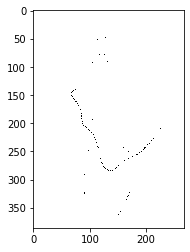

In [26]:

import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('greyish.jpg') #will read circle.png as a     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()        
        
#Now How the heck do I make a parametrization by lines??? 

In [10]:
from PIL import Image 
image_file = Image.open("greyish.jpg") # open colour image
image_file = image_file.convert('1') # convert image to black and white
image_file.save('bwgreyish.png')


(127, 139, 4)
(127, 139, 3)
(127, 139, 4)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

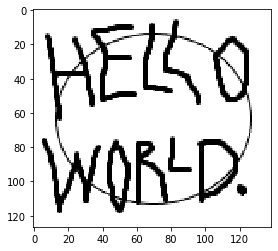

In [109]:
#Screw it lets start making an image detetor:

hexagon = Import('hexagon.png')
circle = Import('circle.png')
hello = Import('helloworld.png')
#These should be very different 
 
hexagon= np.array(hexagon)
circle = np.array(circle)
hello = np.array(hello)

print(np.shape(hexagon))
print(np.shape(circle))
print(np.shape(hello))

for i in range(len(hexagon)):
    for j in range(len(hexagon[0])):
        if hello[i][j][3]!= 1:
            print [i,j]
resizehello = np.zeros(np.shape(circle))
resizehexagon = np.zeros(np.shape(circle))
for i in range(len(circle)):
    for j in range(len(circle[0])):
        for k in range(len(circle[0][0])):
            resizehello[i][j][k] = hello[i][j][k]
            resizehexagon[i][j][k] = hello[i][j][k]
            
#plt.imshow(resizehello)
def ImageDetector(TrueImage, GeneratedImage):
    """
    True image and Generated Image should be arrays of the same dimension
    """
    TI = TrueImage
    GI = GeneratedImage
    ##Put Montecarlo In place here
    
    